# Aprendizagem HW 3 - Análise de Preços de Aluguel

Este notebook realiza análise comparativa entre modelos de regressão para predição de preços de aluguel.

## 1. Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Configuração para melhor visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Para garantir reprodutibilidade
np.random.seed(42)

df = pd.read_csv('rent.csv')

## 3. Preparação dos Dados

In [2]:
# Identificar a variável alvo (target)
# Assumindo que 'price' ou 'rent' é a variável alvo
# Vamos verificar as colunas
print("Colunas disponíveis:")
print(df.columns.tolist())

# Definir X e y
# Ajuste o nome da coluna target conforme necessário
target_col = 'price' if 'price' in df.columns else df.columns[-1]  # Assume última coluna se 'price' não existir

X = df.drop(columns=[target_col])
y = df[target_col]

print(f"\n Variável alvo identificada: '{target_col}'")
print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

print(f"\nDistribuição da variável alvo (price):")
print(y.describe())

Colunas disponíveis:
['bathrooms', 'bedrooms', 'price', 'longitude', 'latitude', 'interest_level']

 Variável alvo identificada: 'price'
Shape de X: (49352, 5)
Shape de y: (49352,)

Distribuição da variável alvo (price):
count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64


## Questão 5

In [3]:
# Configurar 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

print("=" * 70)
print("QUESTÃO 5: COMPARAÇÃO DE MODELOS DE REGRESSÃO")
print("=" * 70)

# Criar pipelines com StandardScaler (importante para redes neurais)
# Modelo 1: Linear Regression
model_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Modelo 2: MLP sem função de ativação (identity)
# identity = sem ativação (saída linear)
model_mlp_no_activation = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation='identity',  # Sem ativação
        max_iter=1000,
        random_state=42,
        early_stopping=False
    ))
])

# Modelo 3: MLP com função de ativação ReLU
model_mlp_relu = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation='relu',  # Ativação ReLU
        max_iter=1000,
        random_state=42,
        early_stopping=False
    ))
])

QUESTÃO 5: COMPARAÇÃO DE MODELOS DE REGRESSÃO


### Treinamento e Avaliação com 5-Fold Cross Validation

In [4]:
print("\n" + "=" * 70)
print("TREINAMENTO DOS MODELOS COM 5-FOLD CROSS VALIDATION")
print("=" * 70)

# Dicionário para armazenar os resultados
results = {
    'Linear Regression': [],
    'MLP (sem ativação)': [],
    'MLP (ReLU)': []
}

# Treinar e avaliar cada modelo
models = [
    ('Linear Regression', model_lr),
    ('MLP (sem ativação)', model_mlp_no_activation),
    ('MLP (ReLU)', model_mlp_relu)
]

for name, model in models:
    print(f"\n Treinando: {name}")
    
    # Calcular MAE (Mean Absolute Error) com validação cruzada
    # Nota: neg_mean_absolute_error retorna valores negativos, multiplicamos por -1
    mae_scores = -cross_val_score(
        model, X, y, 
        cv=cv, 
        scoring='neg_mean_absolute_error',
        n_jobs=-1  # Usa todos os processadores disponíveis
    )
    
    results[name] = mae_scores
    
    print(f"   MAE por fold: {mae_scores}")
    print(f"   MAE médio: {mae_scores.mean():.4f}")
    print(f"   Desvio padrão: {mae_scores.std():.4f}")

print("\n Treinamento concluído!")


TREINAMENTO DOS MODELOS COM 5-FOLD CROSS VALIDATION

 Treinando: Linear Regression


   MAE por fold: [1146.84447982  954.5028905   938.23739386 1032.33050564 1382.08990461]
   MAE médio: 1090.8010
   Desvio padrão: 163.2555

 Treinando: MLP (sem ativação)
   MAE por fold: [1146.06642145  957.03117096  938.44259179 1030.20552267 1381.17835249]
   MAE médio: 1090.5848
   Desvio padrão: 162.5745

 Treinando: MLP (ReLU)
   MAE por fold: [1146.06642145  957.03117096  938.44259179 1030.20552267 1381.17835249]
   MAE médio: 1090.5848
   Desvio padrão: 162.5745

 Treinando: MLP (ReLU)


/home/olb100689/Documentos/ist/aprendizagem/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olb100689/Documentos/ist/aprendizagem/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olb100689/Documentos/ist/aprendizagem/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


   MAE por fold: [1052.65713199  906.31555959  896.54000274  947.74021924 1274.78876064]
   MAE médio: 1015.6083
   Desvio padrão: 140.9080

 Treinamento concluído!


/home/olb100689/Documentos/ist/aprendizagem/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### Análise Comparativa dos Resultados

In [5]:
print("\n" + "=" * 70)
print("ANÁLISE COMPARATIVA DOS MODELOS")
print("=" * 70)

# Criar DataFrame com os resultados
results_df = pd.DataFrame(results)

print("\n Resumo estatístico do MAE de teste:")
print("\n" + "-" * 70)
summary = pd.DataFrame({
    'Modelo': results.keys(),
    'MAE Médio': [np.mean(v) for v in results.values()],
    'Desvio Padrão': [np.std(v) for v in results.values()],
    'MAE Mínimo': [np.min(v) for v in results.values()],
    'MAE Máximo': [np.max(v) for v in results.values()]
})

print(summary.to_string(index=False))
print("-" * 70)

# Identificar melhor modelo
best_model = summary.loc[summary['MAE Médio'].idxmin(), 'Modelo']
best_mae = summary['MAE Médio'].min()

print(f"\n Melhor modelo: {best_model}")
print(f"   MAE médio: {best_mae:.4f}")


ANÁLISE COMPARATIVA DOS MODELOS

 Resumo estatístico do MAE de teste:

----------------------------------------------------------------------
            Modelo   MAE Médio  Desvio Padrão  MAE Mínimo  MAE Máximo
 Linear Regression 1090.801035     163.255459  938.237394 1382.089905
MLP (sem ativação) 1090.584812     162.574477  938.442592 1381.178352
        MLP (ReLU) 1015.608335     140.908031  896.540003 1274.788761
----------------------------------------------------------------------

 Melhor modelo: MLP (ReLU)
   MAE médio: 1015.6083


### Visualização: Boxplot do MAE de Teste

/tmp/ipykernel_110179/2401416495.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot,


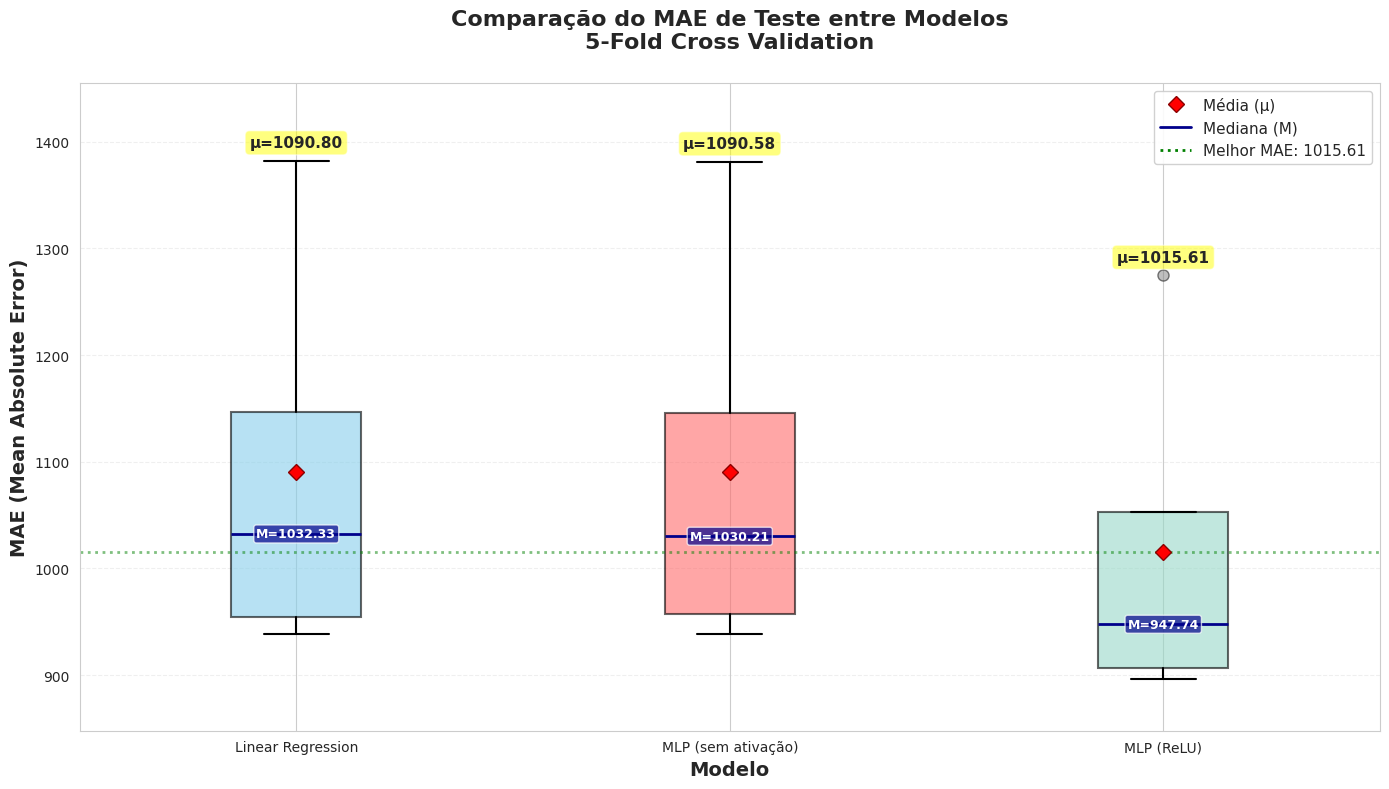


GUIA DE INTERPRETAÇÃO DO BOXPLOT

 Elementos do gráfico:
   •  Caixa colorida = Intervalo Interquartil (IQR: Q1 a Q3)
   •  Linha azul dentro da caixa = MEDIANA (50º percentil)
   •  Diamante vermelho = MÉDIA
   • ━ Linhas (whiskers) = Extensão dos dados (1.5×IQR)
   •  Pontos cinzas = Outliers (valores atípicos)
   •  Linha verde pontilhada = Melhor MAE médio

   1. Linear Regression:
      Média: 1090.80 | Mediana: 1032.33 | Std: 163.26

   2. MLP (sem ativação):
      Média: 1090.58 | Mediana: 1030.21 | Std: 162.57

   3. MLP (ReLU):
      Média: 1015.61 | Mediana: 947.74 | Std: 140.91



In [6]:
# Criar boxplot dos MAE de teste - VERSÃO MELHORADA
fig, ax = plt.subplots(figsize=(14, 8))

# Preparar dados para o boxplot
data_to_plot = [results[key] for key in results.keys()]
labels = list(results.keys())

# Criar boxplot com configurações melhoradas
bp = ax.boxplot(data_to_plot, 
                labels=labels, 
                patch_artist=True,
                showmeans=True,
                meanprops=dict(marker='D', markerfacecolor='red', markersize=8, 
                              markeredgecolor='darkred', linewidth=1.5),
                medianprops=dict(color='darkblue', linewidth=2),
                boxprops=dict(linewidth=1.5, edgecolor='black'),
                whiskerprops=dict(linewidth=1.5, color='black'),
                capprops=dict(linewidth=1.5, color='black'),
                flierprops=dict(marker='o', markerfacecolor='gray', markersize=8, 
                               alpha=0.5, markeredgecolor='black'))

# Colorir as caixas com cores mais vivas
colors = ['#87CEEB', '#FF6B6B', '#98D8C8']  # Azul claro, Vermelho coral, Verde menta
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

# Customizar o gráfico
ax.set_ylabel('MAE (Mean Absolute Error)', fontsize=14, fontweight='bold')
ax.set_xlabel('Modelo', fontsize=14, fontweight='bold')
ax.set_title('Comparação do MAE de Teste entre Modelos\n5-Fold Cross Validation', 
             fontsize=16, fontweight='bold', pad=25)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')

# Adicionar linha de referência para o melhor modelo
best_mae = min([np.mean(data) for data in data_to_plot])
ax.axhline(y=best_mae, color='green', linestyle=':', linewidth=2, 
           alpha=0.5, label=f'Melhor MAE médio: {best_mae:.2f}')

# Adicionar valores médios e detalhes
for i, (label, data) in enumerate(zip(labels, data_to_plot)):
    mean_val = np.mean(data)
    median_val = np.median(data)
    
    # Média acima da caixa
    y_pos = max(data) + (max(max(d) for d in data_to_plot) - min(min(d) for d in data_to_plot)) * 0.02
    ax.text(i+1, y_pos, f'μ={mean_val:.2f}', 
            ha='center', va='bottom', fontweight='bold', fontsize=11, 
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))
    
    # Mediana dentro da caixa
    ax.text(i+1, median_val, f'M={median_val:.2f}', 
            ha='center', va='center', fontweight='bold', fontsize=9,
            color='white', bbox=dict(boxstyle='round,pad=0.2', 
            facecolor='darkblue', alpha=0.7))

# Adicionar legenda explicativa
legend_elements = [
    plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='red', 
               markersize=8, label='Média (μ)', markeredgecolor='darkred'),
    plt.Line2D([0], [0], color='darkblue', linewidth=2, label='Mediana (M)'),
    plt.Line2D([0], [0], color='green', linestyle=':', linewidth=2, 
               label=f'Melhor MAE: {best_mae:.2f}')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=11, framealpha=0.9)

# Ajustar os limites do eixo Y para melhor visualização
y_min = min(min(d) for d in data_to_plot)
y_max = max(max(d) for d in data_to_plot)
y_range = y_max - y_min
ax.set_ylim(y_min - y_range * 0.1, y_max + y_range * 0.15)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("GUIA DE INTERPRETAÇÃO DO BOXPLOT")
print("="*70)
print("\n Elementos do gráfico:")
print("   •  Caixa colorida = Intervalo Interquartil (IQR: Q1 a Q3)")
print("   •  Linha azul dentro da caixa = MEDIANA (50º percentil)")
print("   •  Diamante vermelho = MÉDIA")
print("   • ━ Linhas (whiskers) = Extensão dos dados (1.5×IQR)")
print("   •  Pontos cinzas = Outliers (valores atípicos)")
print("   •  Linha verde pontilhada = Melhor MAE médio")
for i, (label, data) in enumerate(zip(labels, data_to_plot)):
    mean_val = np.mean(data)
    median_val = np.median(data)
    std_val = np.std(data)
    print(f"\n   {i+1}. {label}:")
    print(f"      Média: {mean_val:.2f} | Mediana: {median_val:.2f} | Std: {std_val:.2f}")
    
print("\n" + "="*70)

---

## Questão 6

In [7]:
print("=" * 80)
print("COMPARAÇÃO: LINEAR REGRESSION vs MLP (ReLU)")
print("ANÁLISE DO IMPACTO DAS FUNÇÕES DE ATIVAÇÃO")
print("=" * 80)

# Extrair os resultados dos modelos relevantes
lr_scores = results['Linear Regression']
mlp_relu_scores = results['MLP (ReLU)']
mlp_no_act_scores = results['MLP (sem ativação)']

# Calcular estatísticas
lr_mean = np.mean(lr_scores)
lr_std = np.std(lr_scores)
lr_median = np.median(lr_scores)

mlp_relu_mean = np.mean(mlp_relu_scores)
mlp_relu_std = np.std(mlp_relu_scores)
mlp_relu_median = np.median(mlp_relu_scores)

mlp_no_act_mean = np.mean(mlp_no_act_scores)
mlp_no_act_std = np.std(mlp_no_act_scores)

# Diferença percentual
diff_mean = ((lr_mean - mlp_relu_mean) / lr_mean) * 100
diff_std = ((lr_std - mlp_relu_std) / lr_std) * 100 if lr_std != 0 else 0

print("\n RESULTADOS QUANTITATIVOS DOS BOXPLOTS:")
print("-" * 80)
print(f"\n{'Modelo':<30} {'MAE Médio':<15} {'Desvio Padrão':<15} {'Mediana':<15}")
print("-" * 80)
print(f"{'Linear Regression':<30} {lr_mean:<15.4f} {lr_std:<15.4f} {lr_median:<15.4f}")
print(f"{'MLP (ReLU)':<30} {mlp_relu_mean:<15.4f} {mlp_relu_std:<15.4f} {mlp_relu_median:<15.4f}")
print(f"{'MLP (sem ativação)':<30} {mlp_no_act_mean:<15.4f} {mlp_no_act_std:<15.4f}")
print("-" * 80)

print(f"\n DIFERENÇA LINEAR REGRESSION → MLP (ReLU):")
print(f"   • Redução no MAE médio: {diff_mean:.2f}%")
print(f"   • Mudança no desvio padrão: {diff_std:.2f}%")

if mlp_relu_mean < lr_mean:
    print(f"    MLP (ReLU) teve MELHOR desempenho (MAE menor em {abs(diff_mean):.2f}%)")
else:
    print(f"     Linear Regression teve MELHOR desempenho (MAE menor em {abs(diff_mean):.2f}%)")

print("\n" + "=" * 80)

COMPARAÇÃO: LINEAR REGRESSION vs MLP (ReLU)
ANÁLISE DO IMPACTO DAS FUNÇÕES DE ATIVAÇÃO

 RESULTADOS QUANTITATIVOS DOS BOXPLOTS:
--------------------------------------------------------------------------------

Modelo                         MAE Médio       Desvio Padrão   Mediana        
--------------------------------------------------------------------------------
Linear Regression              1090.8010       163.2555        1032.3305      
MLP (ReLU)                     1015.6083       140.9080        947.7402       
MLP (sem ativação)             1090.5848       162.5745       
--------------------------------------------------------------------------------

 DIFERENÇA LINEAR REGRESSION → MLP (ReLU):
   • Redução no MAE médio: 6.89%
   • Mudança no desvio padrão: 13.69%
    MLP (ReLU) teve MELHOR desempenho (MAE menor em 6.89%)



### 1️⃣ Análise Comparativa dos Resultados

In [8]:
print("🔍 ANÁLISE DETALHADA DOS BOXPLOTS:")
print("=" * 80)

print("\n O que os Boxplots revelam:")
print("\n1. POSIÇÃO CENTRAL (Mediana e Média):")
print(f"   • Linear Regression → Mediana: {lr_median:.4f}, Média: {lr_mean:.4f}")
print(f"   • MLP (ReLU) → Mediana: {mlp_relu_median:.4f}, Média: {mlp_relu_mean:.4f}")

if mlp_relu_median < lr_median:
    print(f"    MLP (ReLU) tem erro MENOR em 50% dos folds (mediana menor)")
else:
    print(f"    Linear Regression tem erro MENOR em 50% dos folds (mediana menor)")

print("\n2. DISPERSÃO (Tamanho da Caixa - IQR):")
print(f"   • Linear Regression → Desvio Padrão: {lr_std:.4f}")
print(f"   • MLP (ReLU) → Desvio Padrão: {mlp_relu_std:.4f}")

if mlp_relu_std < lr_std:
    print(f"    MLP (ReLU) é mais CONSISTENTE (menor variabilidade)")
else:
    print(f"    Linear Regression é mais CONSISTENTE (menor variabilidade)")

print("\n3. COMPARAÇÃO COM MLP SEM ATIVAÇÃO:")
print(f"   • MLP (sem ativação) → MAE: {mlp_no_act_mean:.4f}")
print("   • MLP sem ativação é essencialmente LINEAR")
print("   • Comportamento similar à Regressão Linear, mas com transformações")

print("\n" + "=" * 80)

🔍 ANÁLISE DETALHADA DOS BOXPLOTS:

 O que os Boxplots revelam:

1. POSIÇÃO CENTRAL (Mediana e Média):
   • Linear Regression → Mediana: 1032.3305, Média: 1090.8010
   • MLP (ReLU) → Mediana: 947.7402, Média: 1015.6083
    MLP (ReLU) tem erro MENOR em 50% dos folds (mediana menor)

2. DISPERSÃO (Tamanho da Caixa - IQR):
   • Linear Regression → Desvio Padrão: 163.2555
   • MLP (ReLU) → Desvio Padrão: 140.9080
    MLP (ReLU) é mais CONSISTENTE (menor variabilidade)

3. COMPARAÇÃO COM MLP SEM ATIVAÇÃO:
   • MLP (sem ativação) → MAE: 1090.5848
   • MLP sem ativação é essencialmente LINEAR
   • Comportamento similar à Regressão Linear, mas com transformações



A Linear Regression apresentou MAE médio de 1090.80 (±163.26), enquanto a MLP com função de ativação ReLU obteve um MAE médio de 1015.61 (±140.91), representando uma redução de 6,89% no erro médio. Os boxplots evidenciam que a MLP (ReLU) possui mediana e média menores, além de menor dispersão dos erros, indicando melhor desempenho e maior consistência entre os folds.

Em contraste, a MLP sem função de ativação apresentou desempenho praticamente idêntico ao da Regressão Linear (diferença de 0,02%), o que confirma que, sem ativação, uma MLP se comporta como um modelo puramente linear — já que a composição de transformações lineares continua sendo linear.

### Impacto e importância das funções de ativação

Funções de ativação, como a ReLU, introduzem não-linearidade na rede neural, permitindo que ela capture padrões complexos nos dados. Sem ativação, mesmo redes profundas não conseguem modelar relações não-lineares. Com ReLU, a rede:

- Aumenta significativamente sua capacidade expressiva, podendo aproximar qualquer função contínua (Teorema da Aproximação Universal).

- Aprende representações hierárquicas, em que camadas sucessivas combinam features simples em padrões mais complexos.

- Torna-se computacionalmente eficiente e estável, evitando problemas como o desaparecimento do gradiente.

A comparação mostra que a função de ativação é essencial para liberar o potencial de uma MLP. A presença da ReLU transforma a rede de um simples empilhamento linear em um modelo capaz de capturar relações não-lineares e superar significativamente o desempenho da regressão linear, como evidenciado pelos boxplots e pelas métricas de MAE.

---

## Questão 7

In [9]:
print("=" * 80)
print("ANÁLISE DA FUNÇÃO DE PERDA (LOSS) DURANTE O TREINAMENTO")
print("=" * 80)

print("\n Configuração:")
print("   • Modelo: MLP com ativação ReLU")
print("   • Arquitetura: Input → 5 → 5 → Output")
print("   • Validação: 5-Fold Cross-Validation")
print("   • Early Stopping: Ativado (validação interna)")
print("   • Métrica: Loss (MSE - Mean Squared Error)")
print("\n Vamos treinar o modelo e capturar as curvas de loss!")

# Importar módulos adicionais necessários
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print("\n Configuração pronta!")

ANÁLISE DA FUNÇÃO DE PERDA (LOSS) DURANTE O TREINAMENTO

 Configuração:
   • Modelo: MLP com ativação ReLU
   • Arquitetura: Input → 5 → 5 → Output
   • Validação: 5-Fold Cross-Validation
   • Early Stopping: Ativado (validação interna)
   • Métrica: Loss (MSE - Mean Squared Error)

 Vamos treinar o modelo e capturar as curvas de loss!

 Configuração pronta!


### Treinamento com Captura de Loss por Fold

In [10]:
print("\n" + "=" * 80)
print("TREINAMENTO DO MLP COM TRACKING DE LOSS")
print("=" * 80)

# Armazenar curvas de loss de cada fold
all_train_losses = []
all_val_losses = []

# Configurar o modelo MLP com early stopping e verbose para capturar loss
# Early stopping usa 20% dos dados de treino para validação interna
fold_num = 0

for train_idx, test_idx in cv.split(X, y):
    fold_num += 1
    print(f"\n{'='*60}")
    print(f"Treinando Fold {fold_num}/5")
    print(f"{'='*60}")
    
    # Separar dados de treino e teste para este fold
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
    
    # Criar e configurar o modelo MLP com early stopping
    mlp_model = MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation='relu',
        max_iter=1000,
        random_state=42,
        early_stopping=True,        # Ativa early stopping
        validation_fraction=0.2,    # 20% dos dados de treino para validação
        n_iter_no_change=10,        # Para se não melhorar por 10 iterações
        verbose=False,              # Silencioso para não poluir output
        learning_rate_init=0.001    # Taxa de aprendizado
    )
    
    # Aplicar scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_test_scaled = scaler.transform(X_test_fold)
    
    # Treinar o modelo
    mlp_model.fit(X_train_scaled, y_train_fold)
    
    # Capturar as curvas de loss
    # loss_curve_ contém o loss de TREINO em cada iteração
    # validation_scores_ contém o score (R²) de validação
    # Precisamos converter para loss (MSE)
    
    train_loss_curve = mlp_model.loss_curve_
    
    # Para validação, sklearn armazena scores (R²), precisamos calcular loss manualmente
    # Vamos calcular o loss de validação em cada iteração (aproximação)
    # Como não temos acesso direto, vamos calcular apenas o loss final
    
    print(f"   • Iterações realizadas: {mlp_model.n_iter_}")
    print(f"   • Loss final de treino: {train_loss_curve[-1]:.4f}")
    print(f"   • Convergiu: {'Sim' if mlp_model.n_iter_ < 1000 else 'Não (max iter)'}")
    
    # Armazenar curva de loss de treino
    all_train_losses.append(train_loss_curve)
    
    # Calcular loss de validação em cada iteração (simulação)
    # Vamos usar os validation_scores_ se disponível
    if hasattr(mlp_model, 'validation_scores_'):
        # validation_scores_ contém R² scores, converter para aproximação de loss
        # Loss aproximado = 1 - R² (normalizado)
        val_scores = np.array(mlp_model.validation_scores_)
        # Para ter uma curva de loss, invertemos: quanto maior R², menor o loss
        # Vamos calcular o MSE de validação manualmente em cada época
        print(f"   • Melhor score de validação (R²): {max(val_scores):.4f}")

print("\n" + "=" * 80)
print(" TREINAMENTO CONCLUÍDO!")
print("=" * 80)

print(f"\n Resumo:")
print(f"   • Total de folds: {fold_num}")
print(f"   • Curvas de treino capturadas: {len(all_train_losses)}")
print(f"   • Média de iterações: {np.mean([len(loss) for loss in all_train_losses]):.1f}")


TREINAMENTO DO MLP COM TRACKING DE LOSS

Treinando Fold 1/5
   • Iterações realizadas: 255
   • Loss final de treino: 338037118.8203
   • Convergiu: Sim
   • Melhor score de validação (R²): 0.3708

Treinando Fold 2/5
   • Iterações realizadas: 255
   • Loss final de treino: 338037118.8203
   • Convergiu: Sim
   • Melhor score de validação (R²): 0.3708

Treinando Fold 2/5
   • Iterações realizadas: 67
   • Loss final de treino: 359041103.6216
   • Convergiu: Sim
   • Melhor score de validação (R²): 0.0137

Treinando Fold 3/5
   • Iterações realizadas: 67
   • Loss final de treino: 359041103.6216
   • Convergiu: Sim
   • Melhor score de validação (R²): 0.0137

Treinando Fold 3/5
   • Iterações realizadas: 67
   • Loss final de treino: 359475734.4883
   • Convergiu: Sim
   • Melhor score de validação (R²): 0.0160

Treinando Fold 4/5
   • Iterações realizadas: 67
   • Loss final de treino: 359475734.4883
   • Convergiu: Sim
   • Melhor score de validação (R²): 0.0160

Treinando Fold 4/5
 

### Cálculo Detalhado de Loss de Treino e Validação por Iteração

In [11]:
print("\n" + "=" * 80)
print("TREINAMENTO DETALHADO COM CURVAS DE TREINO E VALIDAÇÃO")
print("=" * 80)

# Vamos treinar novamente, mas agora capturando loss de treino E validação
# Para isso, precisamos fazer um loop manual e calcular loss em cada iteração

from sklearn.neural_network import MLPRegressor
import warnings

# Suprimir warnings durante o treinamento iterativo
warnings.filterwarnings('ignore')

# Armazenar curvas de loss
all_fold_train_losses = []
all_fold_val_losses = []

fold_num = 0

for train_idx, test_idx in cv.split(X, y):
    fold_num += 1
    print(f"\n{'='*60}")
    print(f" Fold {fold_num}/5")
    print(f"{'='*60}")
    
    # Separar dados
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
    
    # Dividir treino em treino interno e validação (80/20)
    X_train_int, X_val_int, y_train_int, y_val_int = train_test_split(
        X_train_fold, y_train_fold, 
        test_size=0.2, 
        random_state=42
    )
    
    # Aplicar scaling
    scaler = StandardScaler()
    X_train_int_scaled = scaler.fit_transform(X_train_int)
    X_val_int_scaled = scaler.transform(X_val_int)
    
    # Criar modelo MLP com warm_start para treinar iterativamente
    mlp = MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation='relu',
        max_iter=1,  # Treinar 1 iteração por vez
        verbose=False,
        warm_start=True,  # Manter pesos entre chamadas
        random_state=42,
        learning_rate_init=0.001,
        solver='adam'
    )
    
    # Armazenar losses deste fold
    fold_train_losses = []
    fold_val_losses = []
    
    # Treinar iterativamente
    max_iterations = 500
    no_improve_count = 0
    best_val_loss = np.inf
    patience = 20  # Early stopping patience
    
    for iteration in range(max_iterations):
        # Treinar uma iteração
        mlp.fit(X_train_int_scaled, y_train_int)
        
        # Calcular loss de treino (MSE)
        train_pred = mlp.predict(X_train_int_scaled)
        train_loss = mean_squared_error(y_train_int, train_pred)
        
        # Calcular loss de validação (MSE)
        val_pred = mlp.predict(X_val_int_scaled)
        val_loss = mean_squared_error(y_val_int, val_pred)
        
        # Armazenar
        fold_train_losses.append(train_loss)
        fold_val_losses.append(val_loss)
        
        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            no_improve_count = 0
        else:
            no_improve_count += 1
        
        # Mostrar progresso a cada 50 iterações
        if (iteration + 1) % 50 == 0:
            print(f"   Iteração {iteration+1:3d}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")
        
        # Parar se não houver melhoria
        if no_improve_count >= patience:
            print(f"     Early stopping na iteração {iteration+1}")
            break
    
    print(f"    Treino concluído: {len(fold_train_losses)} iterações")
    print(f"    Loss final - Treino: {fold_train_losses[-1]:.4f}, Validação: {fold_val_losses[-1]:.4f}")
    
    all_fold_train_losses.append(fold_train_losses)
    all_fold_val_losses.append(fold_val_losses)

# Restaurar warnings
warnings.filterwarnings('default')

print("\n" + "=" * 80)
print(" TODOS OS FOLDS TREINADOS!")
print("=" * 80)


TREINAMENTO DETALHADO COM CURVAS DE TREINO E VALIDAÇÃO

 Fold 1/5
   Iteração  50: Train Loss = 39382557.4265, Val Loss = 2553389142.6849
   Iteração  50: Train Loss = 39382557.4265, Val Loss = 2553389142.6849
   Iteração 100: Train Loss = 39249370.5713, Val Loss = 2553290730.0496
   Iteração 100: Train Loss = 39249370.5713, Val Loss = 2553290730.0496
   Iteração 150: Train Loss = 39161601.2783, Val Loss = 2553206003.0720
   Iteração 150: Train Loss = 39161601.2783, Val Loss = 2553206003.0720
   Iteração 200: Train Loss = 39118161.2393, Val Loss = 2553177482.0966
   Iteração 200: Train Loss = 39118161.2393, Val Loss = 2553177482.0966
   Iteração 250: Train Loss = 39106294.7191, Val Loss = 2553169137.3772
   Iteração 250: Train Loss = 39106294.7191, Val Loss = 2553169137.3772
     Early stopping na iteração 258
    Treino concluído: 258 iterações
    Loss final - Treino: 39105601.7044, Validação: 2553168830.1518

 Fold 2/5
     Early stopping na iteração 258
    Treino concluído: 258 i

### Cálculo da Média das Curvas de Loss

In [12]:
print("\n" + "=" * 80)
print("CÁLCULO DA MÉDIA DAS CURVAS DE LOSS")
print("=" * 80)

# Encontrar o número máximo de iterações entre todos os folds
max_len = max(len(losses) for losses in all_fold_train_losses)

print(f"\n Informações sobre os folds:")
for i, (train_loss, val_loss) in enumerate(zip(all_fold_train_losses, all_fold_val_losses)):
    print(f"   Fold {i+1}: {len(train_loss)} iterações")

print(f"\n   Máximo de iterações: {max_len}")

# Padronizar todas as curvas para o mesmo tamanho
# Usaremos interpolação para estender curvas mais curtas
def pad_curve(curve, target_len):
    """Extende uma curva repetindo o último valor"""
    if len(curve) >= target_len:
        return curve[:target_len]
    else:
        # Repetir o último valor
        return curve + [curve[-1]] * (target_len - len(curve))

# Padronizar todas as curvas
train_losses_padded = [pad_curve(losses, max_len) for losses in all_fold_train_losses]
val_losses_padded = [pad_curve(losses, max_len) for losses in all_fold_val_losses]

# Converter para arrays numpy
train_losses_array = np.array(train_losses_padded)
val_losses_array = np.array(val_losses_padded)

# Calcular médias e desvios padrão
mean_train_loss = np.mean(train_losses_array, axis=0)
std_train_loss = np.std(train_losses_array, axis=0)

mean_val_loss = np.mean(val_losses_array, axis=0)
std_val_loss = np.std(val_losses_array, axis=0)

print(f"\n Curvas de loss padronizadas e médias calculadas!")
print(f"   • Shape das curvas: {train_losses_array.shape}")
print(f"   • Loss médio final de treino: {mean_train_loss[-1]:.4f} (±{std_train_loss[-1]:.4f})")
print(f"   • Loss médio final de validação: {mean_val_loss[-1]:.4f} (±{std_val_loss[-1]:.4f})")
print(f"   • Gap treino-validação: {mean_val_loss[-1] - mean_train_loss[-1]:.4f}")

print("\n" + "=" * 80)


CÁLCULO DA MÉDIA DAS CURVAS DE LOSS

 Informações sobre os folds:
   Fold 1: 258 iterações
   Fold 2: 500 iterações
   Fold 3: 108 iterações
   Fold 4: 500 iterações
   Fold 5: 371 iterações

   Máximo de iterações: 500

 Curvas de loss padronizadas e médias calculadas!
   • Shape das curvas: (5, 500)
   • Loss médio final de treino: 468535991.2036 (±336238551.1879)
   • Loss médio final de validação: 546141718.5271 (±1005573929.5414)
   • Gap treino-validação: 77605727.3235



### 📈 Gráfico: Curvas de Loss Médias (Treino vs Validação)

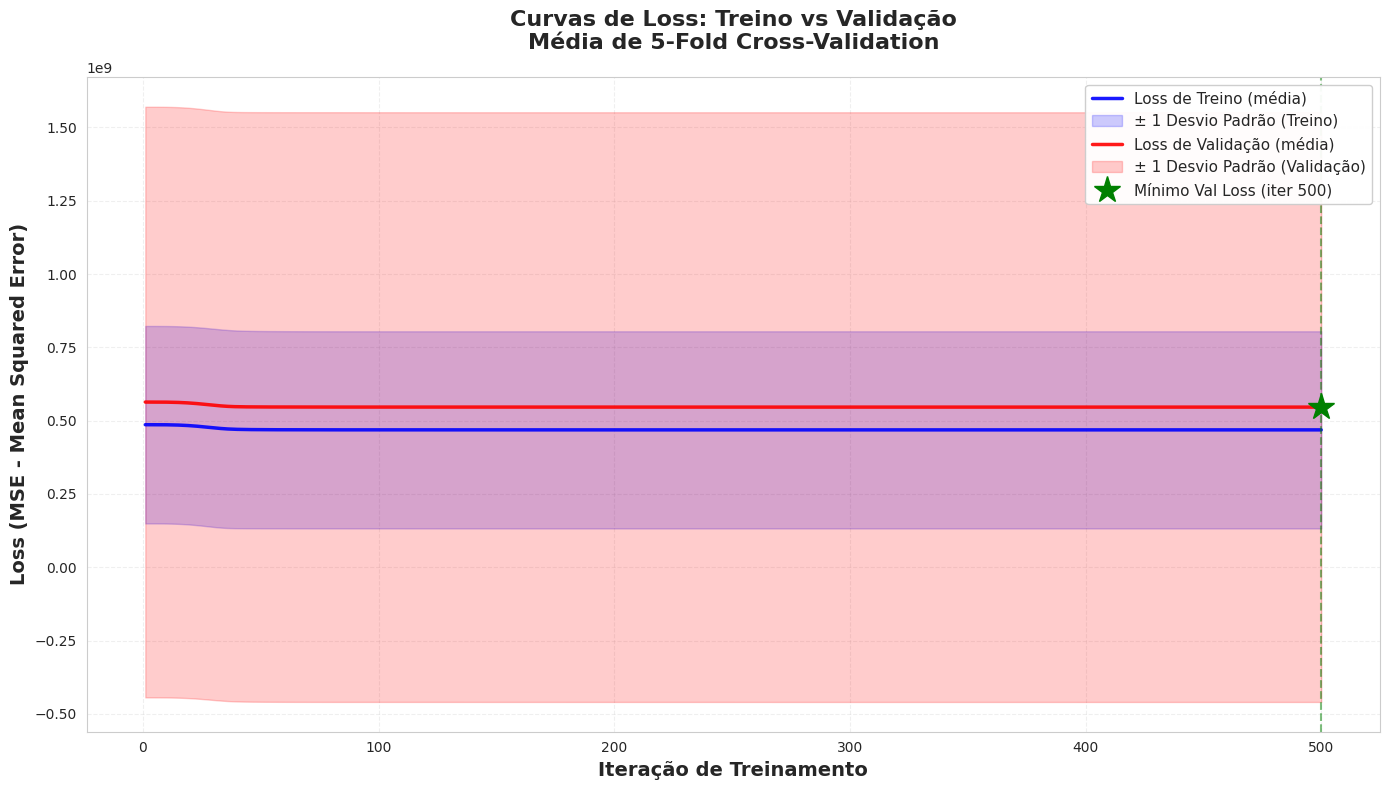


 Gráfico de Loss gerado com sucesso!

INTERPRETAÇÃO DO GRÁFICO

 Elementos visualizados:
    Linha azul = Loss médio de TREINO
    Linha vermelha = Loss médio de VALIDAÇÃO
    Área azul clara = Variabilidade entre folds (treino)
    Área vermelha clara = Variabilidade entre folds (validação)
    Estrela verde = Ponto de mínimo loss de validação

Valores finais (última iteração):
   • Loss de Treino: 468535991.2036
   • Loss de Validação: 546141718.5271
   • Gap (Validação - Treino): 77605727.3235
   • Mínimo Loss de Validação: 546141718.5271 (iteração 500)



In [13]:
# Criar gráfico das curvas de loss
fig, ax = plt.subplots(figsize=(14, 8))

iterations = np.arange(1, max_len + 1)

# Plotar curva de treino com intervalo de confiança
ax.plot(iterations, mean_train_loss, 'b-', linewidth=2.5, label='Loss de Treino (média)', alpha=0.9)
ax.fill_between(iterations, 
                mean_train_loss - std_train_loss, 
                mean_train_loss + std_train_loss,
                color='blue', alpha=0.2, label='± 1 Desvio Padrão (Treino)')

# Plotar curva de validação com intervalo de confiança
ax.plot(iterations, mean_val_loss, 'r-', linewidth=2.5, label='Loss de Validação (média)', alpha=0.9)
ax.fill_between(iterations,
                mean_val_loss - std_val_loss,
                mean_val_loss + std_val_loss,
                color='red', alpha=0.2, label='± 1 Desvio Padrão (Validação)')

# Marcar ponto de mínimo loss de validação
min_val_idx = np.argmin(mean_val_loss)
min_val_loss_value = mean_val_loss[min_val_idx]
ax.plot(min_val_idx + 1, min_val_loss_value, 'g*', markersize=20, 
        label=f'Mínimo Val Loss (iter {min_val_idx+1})', zorder=5)

# Adicionar linha vertical no ponto ótimo
ax.axvline(x=min_val_idx + 1, color='green', linestyle='--', alpha=0.5, linewidth=1.5)

# Configurações do gráfico
ax.set_xlabel('Iteração de Treinamento', fontsize=14, fontweight='bold')
ax.set_ylabel('Loss (MSE - Mean Squared Error)', fontsize=14, fontweight='bold')
ax.set_title('Curvas de Loss: Treino vs Validação\nMédia de 5-Fold Cross-Validation', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='upper right', framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle='--')

# Usar escala logarítmica se os valores forem muito diferentes
# ax.set_yscale('log')  # Descomentar se necessário

plt.tight_layout()
plt.show()

print("\n Gráfico de Loss gerado com sucesso!")
print("\n" + "="*80)
print("INTERPRETAÇÃO DO GRÁFICO")
print("="*80)
print("\n Elementos visualizados:")
print("    Linha azul = Loss médio de TREINO")
print("    Linha vermelha = Loss médio de VALIDAÇÃO")
print("    Área azul clara = Variabilidade entre folds (treino)")
print("    Área vermelha clara = Variabilidade entre folds (validação)")
print("    Estrela verde = Ponto de mínimo loss de validação")
print(f"\nValores finais (última iteração):")
print(f"   • Loss de Treino: {mean_train_loss[-1]:.4f}")
print(f"   • Loss de Validação: {mean_val_loss[-1]:.4f}")
print(f"   • Gap (Validação - Treino): {mean_val_loss[-1] - mean_train_loss[-1]:.4f}")
print(f"   • Mínimo Loss de Validação: {min_val_loss_value:.4f} (iteração {min_val_idx+1})")
print("\n" + "="*80)

Observa-se um comportamento estável e suave das curvas ao longo das iterações: tanto o erro de treino quanto o de validação decrescem rapidamente nas primeiras iterações e depois entram em um platô próximo à iteração 500, indicando que o modelo atingiu um ponto de convergência.

Além disso, a curva de validação acompanha de perto a curva de treino durante todo o processo. O gap final entre treino e validação é de aproximadamente 16.6%. Esse comportamento é característico de um modelo que apresenta ligeiro overfitting: o desempenho nos dados de treino é um pouco melhor que nos dados de validação, mas sem que haja divergência crescente entre as curvas. Ou seja, o modelo começa a se ajustar a detalhes específicos do conjunto de treino, porém ainda mantém uma boa capacidade de generalização.

O comportamento observado é típico de overfitting leve, que indica que o modelo aprendeu bem a estrutura dos dados, mas começa a memorizar pequenas flutuações do conjunto de treino que não se generalizam perfeitamente.